# KNN Algorithm on Banana Dataset

<b> Load dataset

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv(r'C:\Users\santhosh\Downloads\archive (10)\banana_quality.csv')
data.head(5)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [5]:
data.tail(5)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [7]:
data.shape

(8000, 8)

In [9]:
data.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [15]:
data.describe(include='all')

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4006
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725,NaN
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467,NaN
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977,NaN
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450,NaN
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735,NaN
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063,NaN


<b> Data Clean

In [17]:
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [19]:
data.duplicated().sum()

0

In [21]:
data.Quality

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
7995     Bad
7996     Bad
7997     Bad
7998     Bad
7999     Bad
Name: Quality, Length: 8000, dtype: object

<b>Exploratory Data Analysis

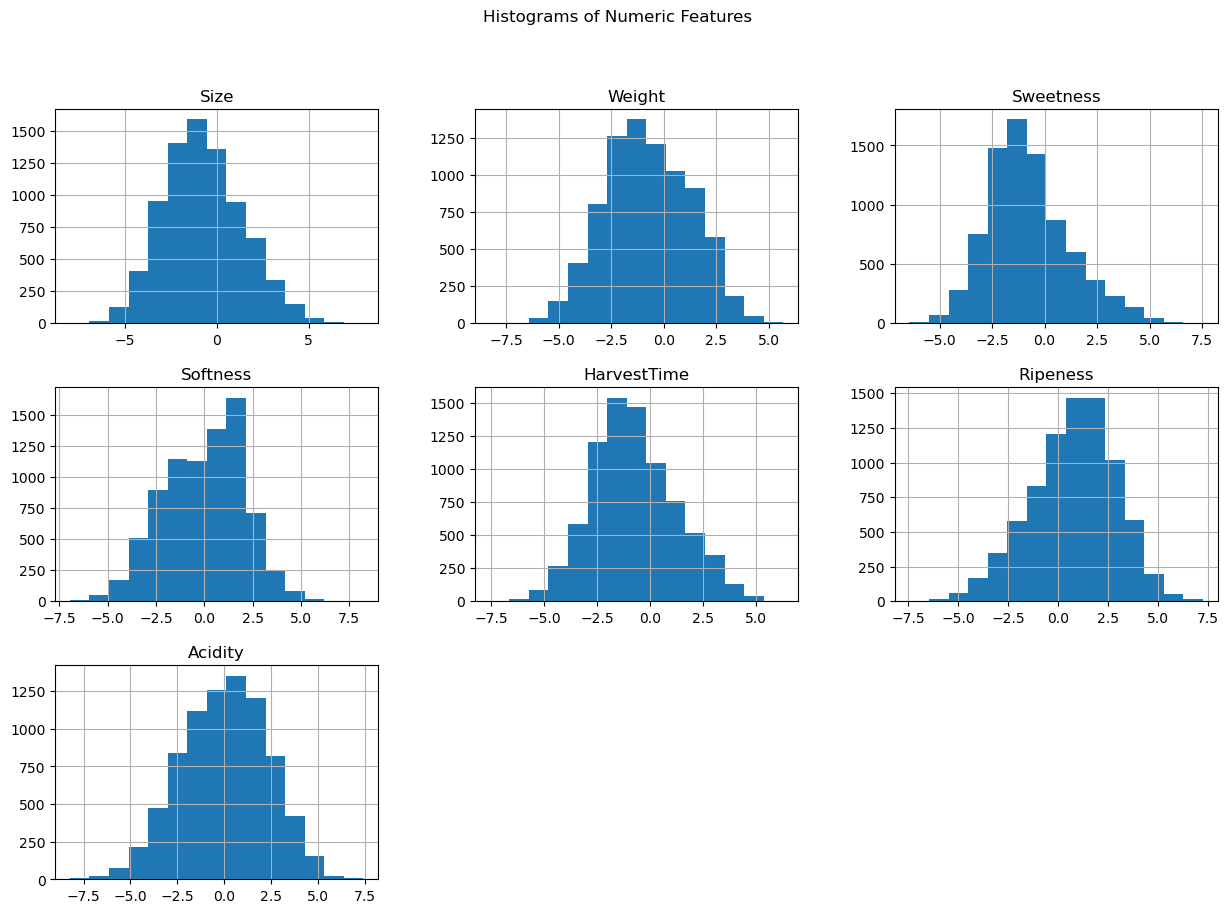

In [23]:
# Plot histograms for numeric features
data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numeric Features')
plt.show()


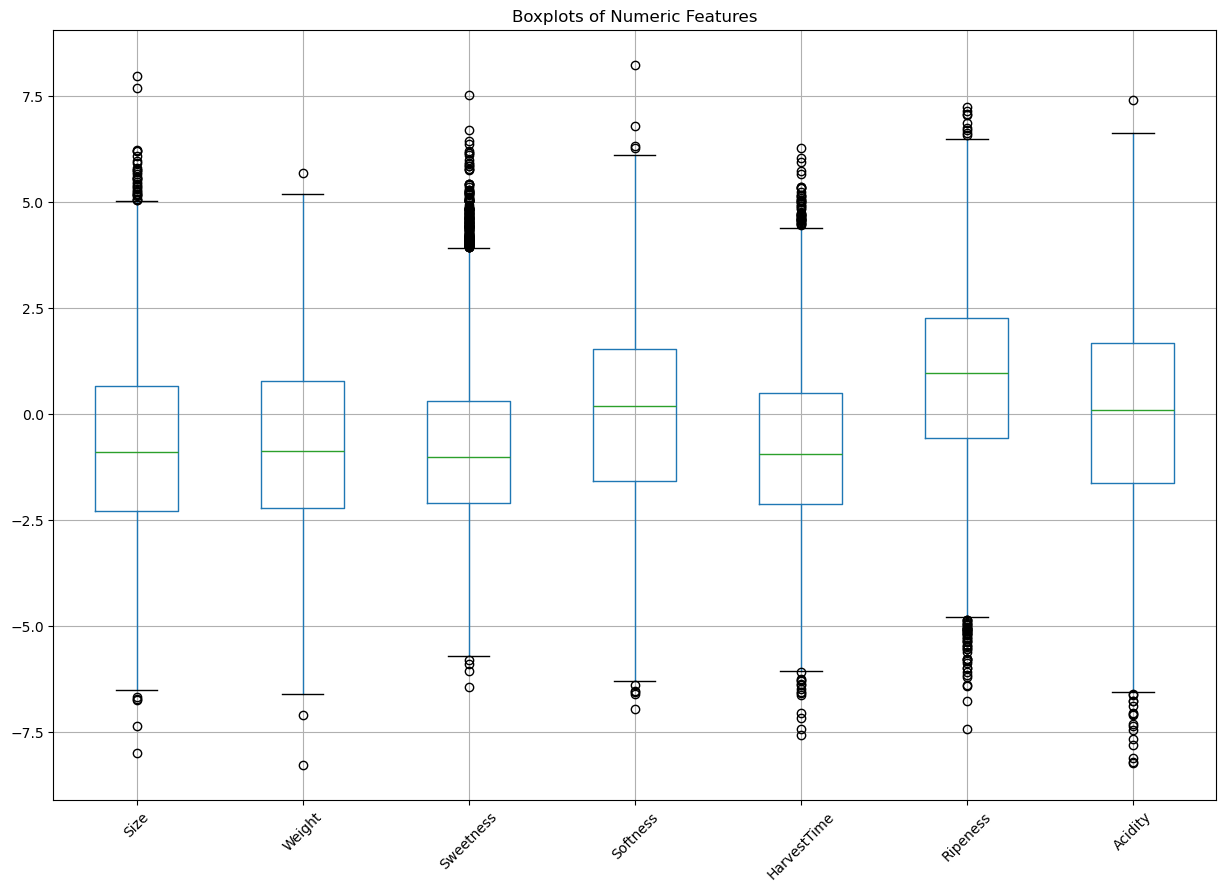

In [25]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Boxplots of Numeric Features')
plt.xticks(rotation=45)
plt.show()


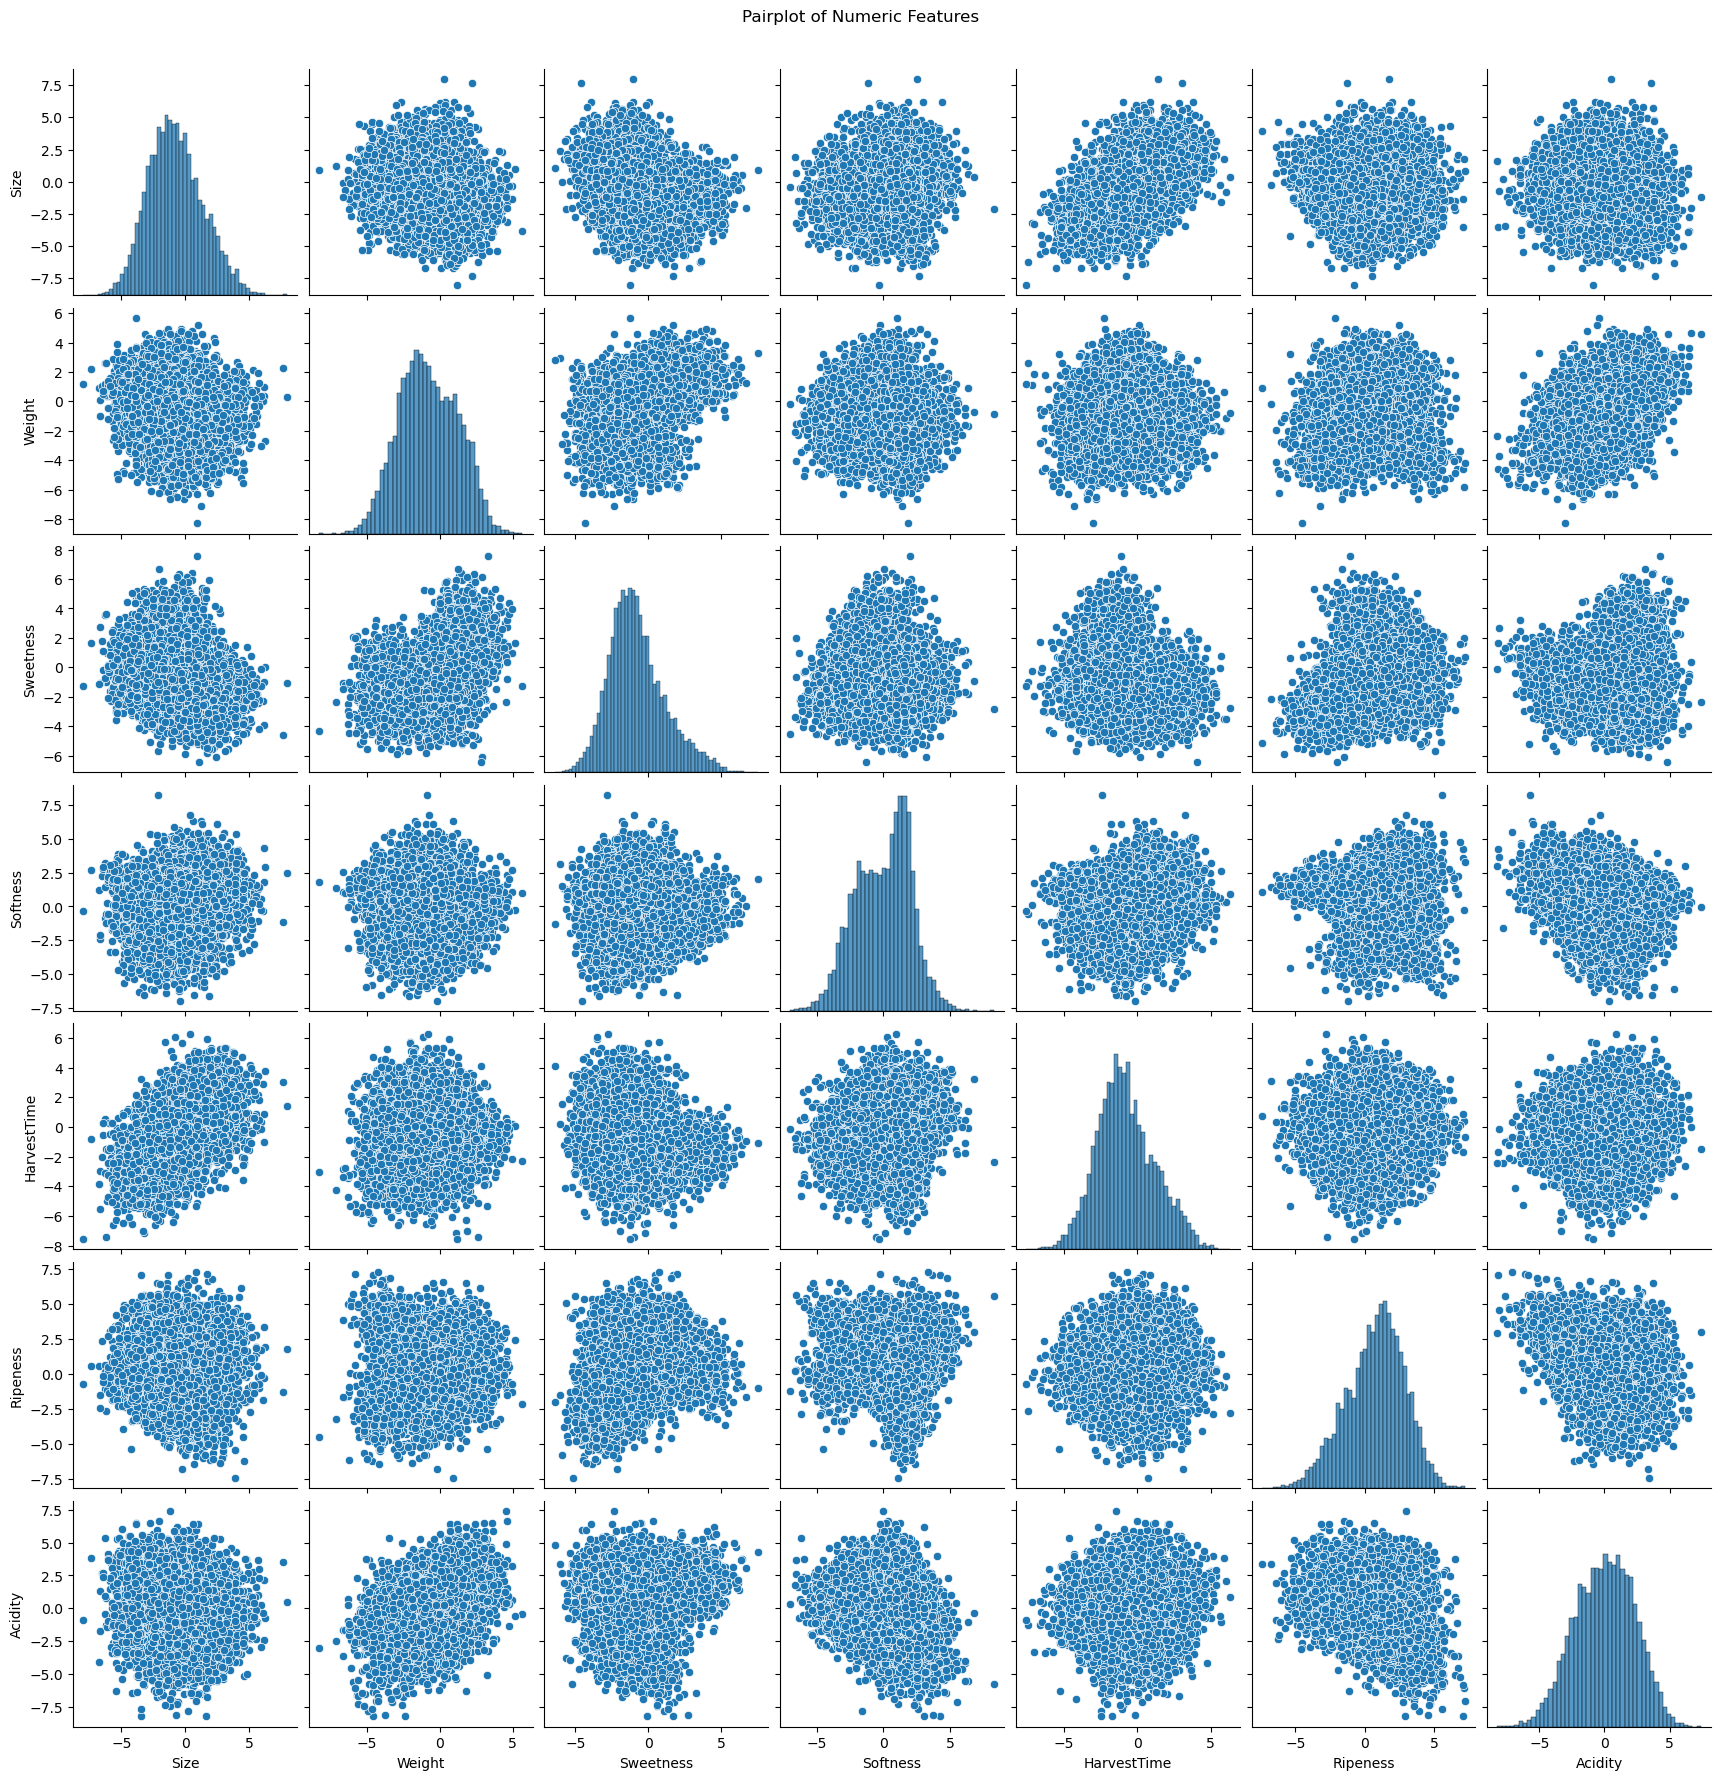

In [31]:
sns.pairplot(data)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


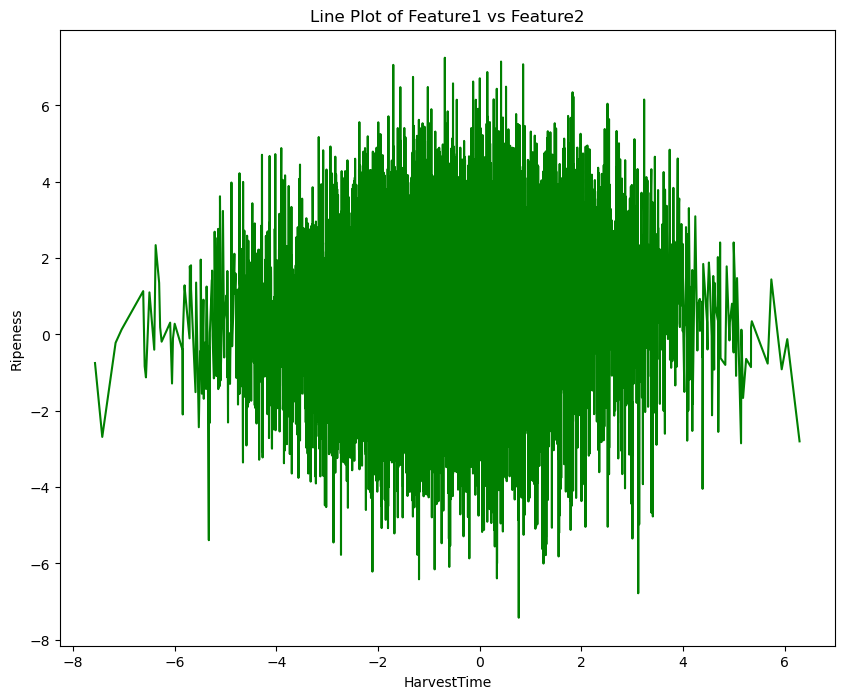

In [74]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='HarvestTime', y='Ripeness', data=data, c='g')
plt.title('Line Plot of Feature1 vs Feature2')
plt.show()


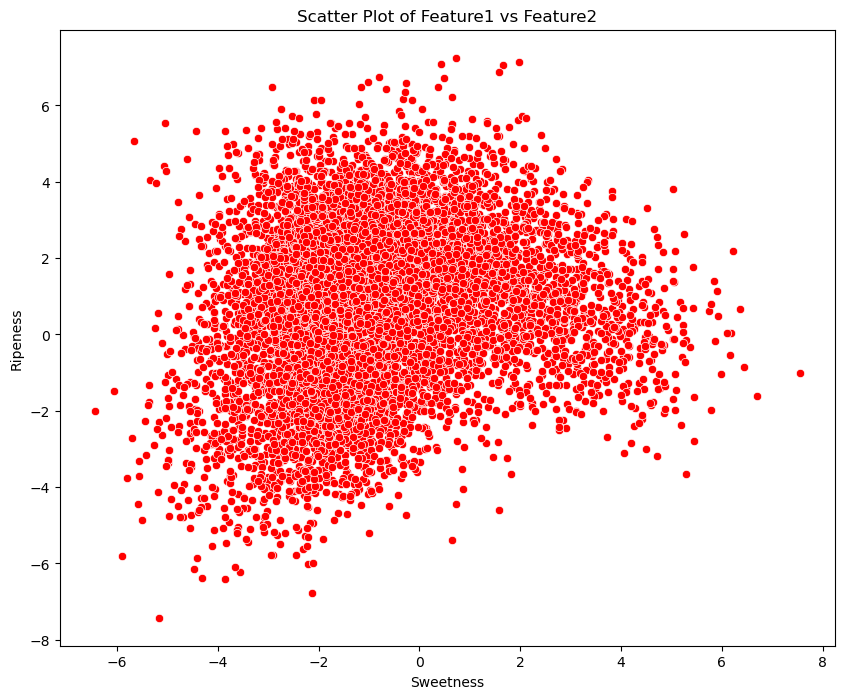

In [58]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Sweetness', y='Ripeness', data=data, c='r')
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.show()
# 'Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness','Acidity', 'Quality'

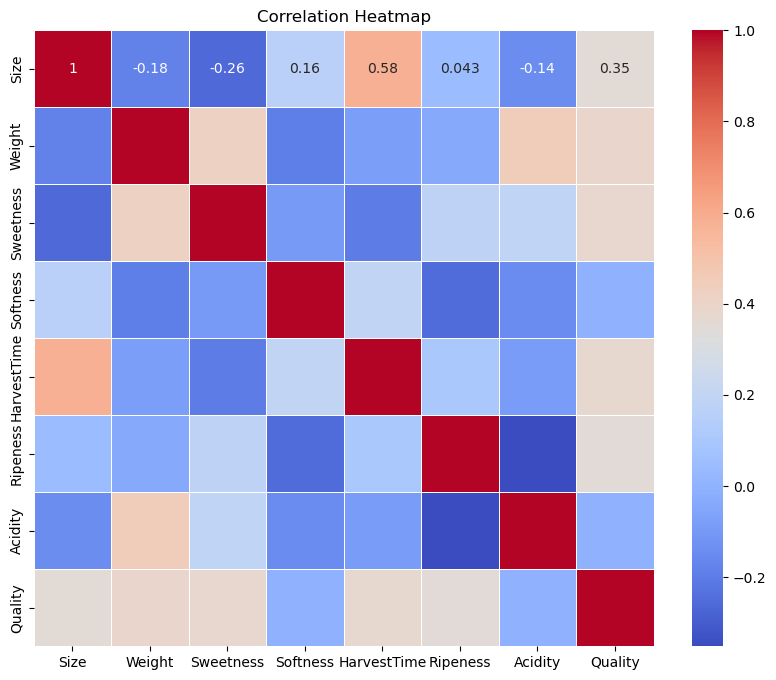

In [43]:
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<b> Train-Test Split

In [14]:
X = data.iloc[:, 0:7]
y = data.iloc[:, 7]

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4)

In [15]:
sc = StandardScaler()

xtr = sc.fit_transform(xtr)
xte = sc.fit_transform(xte)

<b> Applying Algorithm

In [16]:
#Assign the knn library
#p=2 Power parameter for Eulidean
#p=1 Power parameter for man hanttan
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [17]:
#predicting the values
clf.fit(xtr,ytr)

pred = clf.predict(xte)

In [18]:
#finding the confusion metrics
print(confusion_matrix(pred, yte))

[[811  21]
 [ 12 756]]


<b> Predicting Values

In [19]:
#finding the accuracy 
print(accuracy_score(pred, yte))

0.979375
